In [3]:
pip install numpy scipy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from scipy.constants import e,epsilon_0,pi,hbar, m_e, physical_constants
from matplotlib import pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit

In [4]:
##### INPUTS #####

'List of number of electrons leaving nanoparticle'
n_electrons_list = np.array([10000])#np.geomspace(10, 30000, num=100) 

'Diameter of the nanoparticle (m)'
d = 500e-9

'Number of slices the sphere should be cut into in each direction'
Nslices = 151 # preferably odd number




##### CODE #####

##### Compute values from inputs #####

'Size of one cell in the array (m)'
cellSize = d/Nslices



##### Generate sphere as 3D numpy array #####

'Radius of sphere'
radius = int((Nslices-1)/2)

'Cubic array of zeros'
sphere = np.zeros((Nslices,Nslices, Nslices))

'Coordinates of the center of the sphere in the array'
x0, y0, z0 = int(np.floor(sphere.shape[0]/2)), \
        int(np.floor(sphere.shape[1]/2)), int(np.floor(sphere.shape[2]/2))

'List of shell indices'
shell_indices = list()

for x in range(x0-radius, x0+radius+1):
    for y in range(y0-radius, y0+radius+1):
        for z in range(z0-radius, z0+radius+1):
            
            'Current radial distance'
            radial_squared = (x0-x)**2 + (y0-y)**2 + (z0-z)**2
            
            '''deb: measures how far a coordinate in A is far from the center. 
                    deb>=0: inside the sphere.
                    deb<0: outside the sphere.'''
            deb = radius**2 - radial_squared
            
            'If we are in the sphere and on its surface'
            if (deb)>=0 and radius - np.sqrt(radial_squared) < 1:
                
                'Fill surface of sphere with ones (just a check)'
                sphere[x,y,z] = 1
                
                'Current index of cell'
                index = (x,y,z)

                'Add index to list of the ring'
                shell_indices.append(index)

                

##### Compute ion energies on shell #####

'Ion energies squared array'
energies = np.zeros((Nslices,Nslices))

'Loop through ring'
(i,j,k) = shell_indices[0]
    
'Number of cells on the surface'
NcellsSurface = len(shell_indices)

'DC current'
field = 0

'Loop through sphere surface'
for (x,y,z) in shell_indices:

    'Distance between index and current cell'
    r = ( np.sqrt( (x-i)**2 + (y-j)**2 + (z-k)**2 ) + 1 ) * cellSize 
                
    'Charge'
    Q = e * sphere[x,y,z] / NcellsSurface

    'Electric field (V/A)'
    E = Q/(4*pi*epsilon_0*r**2) * 1e-9

    field += E
    


    

##### RESULTS #####

##### Printing inputs #####

print('Inputs:')
print('-------')
print('   Particle diameter (nanometer):            %.0f'%(d/1e-9))
print('   Number of cells in each direction         %.0f'%(Nslices))



##### Printing results #####

print('')
print('Results:')
print('--------')

dc_current_list = list()

'Loop through number of electrons leaving sphere'
for n_electrons in n_electrons_list:
    
    'DC current (V/nm)'
    dc_current = field * n_electrons
    
    dc_current_list.append(dc_current)
    
'Surface density'
surface_density = n_electrons / (4*pi*(d*1e9/2)**2)

print('   Number of electrons leaving nanoparticle: %.0f'%(n_electrons))
print('   Surface density (#e-/nm2):                %.5f'%(surface_density))
print('   DC current at the surface (V/nm):          %.2f'%(dc_current))
print('')

Inputs:
-------
   Particle diameter (nanometer):            500
   Number of cells in each direction         151

Results:
--------
   Number of electrons leaving nanoparticle: 10000
   Surface density (#e-/nm2):                0.01273
   DC current at the surface (V/nm):          0.47



In [26]:
##### INPUTS #####

'List of number of electrons leaving nanoparticle'
n_electrons_list = np.geomspace(10, 80000, num=100) #np.array([5000])

'Diameter of the nanoparticle (m)'
d = 300e-9

'Number of slices the sphere should be cut into in each direction'
Nslices = 151 # preferably odd number




##### CODE #####

##### Compute values from inputs #####

'Size of one cell in the array (m)'
cellSize = d/Nslices



##### Generate sphere as 3D numpy array #####

'Radius of sphere'
radius = int((Nslices-1)/2)

'Cubic array of zeros'
sphere = np.zeros((Nslices,Nslices, Nslices))

'Coordinates of the center of the sphere in the array'
x0, y0, z0 = int(np.floor(sphere.shape[0]/2)), \
        int(np.floor(sphere.shape[1]/2)), int(np.floor(sphere.shape[2]/2))

'List of shell indices'
shell_indices = list()

for x in range(x0-radius, x0+radius+1):
    for y in range(y0-radius, y0+radius+1):
        for z in range(z0-radius, z0+radius+1):
            
            'Current radial distance'
            radial_squared = (x0-x)**2 + (y0-y)**2 + (z0-z)**2
            
            '''deb: measures how far a coordinate in A is far from the center. 
                    deb>=0: inside the sphere.
                    deb<0: outside the sphere.'''
            deb = radius**2 - radial_squared
            
            'If we are in the sphere and on its surface'
            if (deb)>=0 and radius - np.sqrt(radial_squared) < 1:
                
                'Fill surface of sphere with ones (just a check)'
                sphere[x,y,z] = 1
                
                'Current index of cell'
                index = (x,y,z)

                'Add index to list of the ring'
                shell_indices.append(index)

                

##### Compute ion energies on shell #####

'Ion energies squared array'
energies = np.zeros((Nslices,Nslices))

'Loop through ring'
(i,j,k) = shell_indices[0]
    
'Number of cells on the surface'
NcellsSurface = len(shell_indices)

'DC current'
field = 0

'Loop through sphere surface'
for (x,y,z) in shell_indices:

    'Distance between index and current cell'
    r = ( np.sqrt( (x-i)**2 + (y-j)**2 + (z-k)**2 ) + 1 ) * cellSize 
                
    'Charge'
    Q = e * sphere[x,y,z] / NcellsSurface

    'Electric field (V/A)'
    E = Q/(4*pi*epsilon_0*r**2) * 1e-10

    field += E
    


    

##### RESULTS #####

##### Printing inputs #####

print('Inputs:')
print('-------')
print('   Particle diameter (nanometer):            %.0f'%(d/1e-9))
print('   Number of cells in each direction         %.0f'%(Nslices))



##### Printing results #####

print('')
print('Results:')
print('--------')

dc_current_list = list()

'Loop through number of electrons leaving sphere'
for n_electrons in n_electrons_list:
    
    'DC current (V/A)'
    dc_current = field * n_electrons
    
    dc_current_list.append(dc_current)
    
'Surface density'
surface_density = n_electrons / (4*pi*(d*1e9/2)**2)

print('   Number of electrons leaving nanoparticle: %.0f'%(n_electrons))
print('   Surface density (#e-/nm2):                %.5f'%(surface_density))
print('   DC current at the surface (V/A):          %.2f'%(dc_current))
print('')

Inputs:
-------
   Particle diameter (nanometer):            300
   Number of cells in each direction         151

Results:
--------
   Number of electrons leaving nanoparticle: 80000
   Surface density (#e-/nm2):                0.28294
   DC current at the surface (V/A):          1.04



In [35]:
field

np.float64(1.2959248890389712e-05)

In [49]:
d = 500e-9
N = 25000
Q = N*e
E = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9
kick = Q/(4*pi*epsilon_0*(d/2))
surface_density = N / (4*pi*(d*1e9/2)**2)
print(E)
print(kick)
print(surface_density)

0.5759858187467127
143.99645468667816
0.03183098861837907


In [50]:
d = 300e-9
N = 80000
Q = N*e
E = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9
kick = Q/(4*pi*epsilon_0*(d/2))
surface_density = N / (4*pi*(d*1e9/2)**2)
print(E)
print(kick)
print(surface_density)

5.119873944415224
767.9810916622836
0.28294212105225836


In [51]:
d = 100e-9
N = 20000
Q = N*e
E = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9
kick = Q/(4*pi*epsilon_0*(d/2))
surface_density = N / (4*pi*(d*1e9/2)**2)
print(E)
print(kick)
print(surface_density)

11.519716374934257
575.9858187467127
0.6366197723675814


In [9]:
d = 150e-9
N = 14000
Q = N*e
E = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9
kick = Q/(4*pi*epsilon_0*(d/2))
surface_density = N / (4*pi*(d*1e9/2)**2)
print(E)
print(kick)
print(surface_density)

3.5839117610906563
268.7933820817992
0.19805948473658086


In [5]:
d = 300e-9
N = 53823
Q = N*e
monoE = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9
kick = Q/(4*pi*epsilon_0*(d/2))
surface_density = N / (4*pi*(d*1e9/2)**2)
print(monoE)
print(kick)
print(surface_density)

3.444587191378258
516.6880787067387
0.19035992226744627


In [ ]:
d = 300e-9
N = 97069/2
distance = 290
Q = N*e
E = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9
totalE = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9 + Q/(4*pi*epsilon_0*(d/2+distance)**2) * 1e-9 
kick = Q/(4*pi*epsilon_0*(d/2))
surface_density = N / (4*pi*(d*1e9/2)**2)
print(E)
print(totalE)

2.7299984101525703
3.075124135090377


3.1061315244402588
465.9197286660388
0.17165567967763543


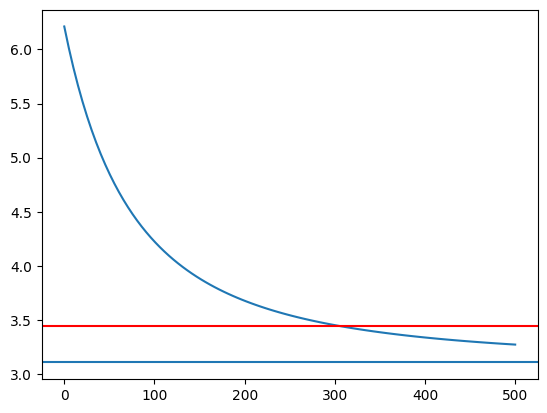

In [7]:
d = 300e-9
N = 97069/2
maxdistance = 500e-9
distance = np.linspace(0, maxdistance, 100)
Q = N*e
E = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9
totalE = Q/(4*pi*epsilon_0*(d/2)**2) * 1e-9 + Q/(4*pi*epsilon_0*(d/2+distance)**2) * 1e-9 
kick = Q/(4*pi*epsilon_0*(d/2))
surface_density = N / (4*pi*(d*1e9/2)**2)
print(E)
# print(totalE)
print(kick)
print(surface_density)
plt.plot(distance*1e9, totalE)
# plt.plot(distance*1e9, totalE*2)
plt.axhline(monoE,c='r')
plt.axhline(E)

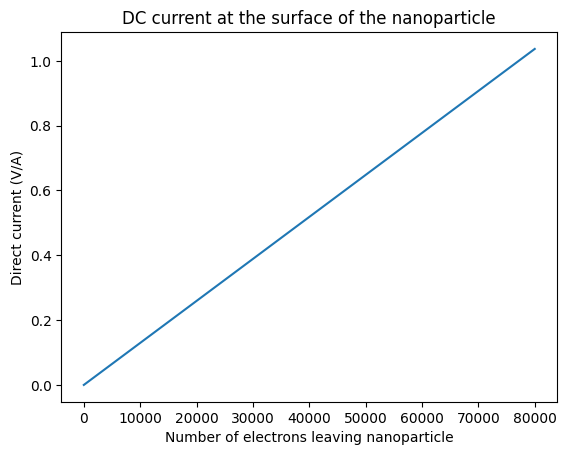

In [27]:
##### PLOT #####

plt.figure()
plt.plot(n_electrons_list, dc_current_list)

#plt.xscale('log')
#plt.yscale('log')
plt.title("DC current at the surface of the nanoparticle")
plt.xlabel('Number of electrons leaving nanoparticle')
plt.ylabel('Direct current (V/A)')

plt.show()

### Plot ion energy as a function of generated electrons

In [23]:
##### INPUTS #####

'List of number of electrons leaving nanoparticle'
n_electrons_list = np.geomspace(10, 30000, num=100)

'Diameter of the nanoparticle (m)'
d = 500e-9

'Number of slices the sphere should be cut into in each direction'
Nslices = 151 # preferably odd number




##### CODE #####

##### Compute values from inputs #####

'Size of one cell in the array (m)'
cellSize = d/Nslices



##### Generate sphere as 3D numpy array #####

'Radius of sphere'
radius = int((Nslices-1)/2)

'Cubic array of zeros'
sphere = np.zeros((Nslices,Nslices, Nslices))

'Coordinates of the center of the sphere in the array'
x0, y0, z0 = int(np.floor(sphere.shape[0]/2)), \
        int(np.floor(sphere.shape[1]/2)), int(np.floor(sphere.shape[2]/2))

'List of shell indices'
shell_indices = list()

for x in range(x0-radius, x0+radius+1):
    for y in range(y0-radius, y0+radius+1):
        for z in range(z0-radius, z0+radius+1):
            
            'Current radial distance'
            radial_squared = (x0-x)**2 + (y0-y)**2 + (z0-z)**2
            
            '''deb: measures how far a coordinate in A is far from the center. 
                    deb>=0: inside the sphere.
                    deb<0: outside the sphere.'''
            deb = radius**2 - radial_squared
            
            'If we are in the sphere and on its surface'
            if (deb)>=0 and radius - np.sqrt(radial_squared) < 1:
                
                'Fill surface of sphere with ones (just a check)'
                sphere[x,y,z] = 1
                
                'Current index of cell'
                index = (x,y,z)

                'Add index to list of the ring'
                shell_indices.append(index)
                


##### Compute ion energies on shell #####

'Ion energies squared array'
energies = np.zeros((Nslices,Nslices))

'Loop through ring'
(i,j,k) = shell_indices[0]
    
'Number of cells on the surface'
NcellsSurface = len(shell_indices)

'Electron energy'
e_energy = 0

'Loop through sphere surface'
for (x,y,z) in shell_indices:

    'Distance between index and current cell'
    r = ( np.sqrt( (x-i)**2 + (y-j)**2 + (z-k)**2 ) + 1 ) * cellSize 
                
    'Charge'
    Q = e * sphere[x,y,z] / NcellsSurface

    'Electron energy (eV)'
    E = Q/(4*pi*epsilon_0*r)

    e_energy += E

In [24]:
##### RESULTS #####

##### Printing inputs #####

print('Inputs:')
print('-------')
print('   Particle diameter (nanometer):            %.0f'%(d/1e-9))
print('   Number of cells in each direction         %.0f'%(Nslices))



##### Printing results #####

print('')
print('Results:')
print('--------')

ion_energy_list = list()

'Loop through number of electrons leaving sphere'
for n_electrons in n_electrons_list:
    
    'Ion energy (eV)'
    ion_energy = e_energy * n_electrons
    
    ion_energy_list.append(ion_energy)
    
'Surface density'
surface_density = n_electrons / (4*pi*(d*1e9/2)**2)

print('   Number of electrons leaving nanoparticle: %.0f'%(n_electrons))
print('   Surface density (#e-/nm2):                %.5f'%(surface_density))
print('   Ion energy at the surface (eV):          %.2f'%(ion_energy))
print('')

Inputs:
-------
   Particle diameter (nanometer):            500
   Number of cells in each direction         151

Results:
--------
   Number of electrons leaving nanoparticle: 30000
   Surface density (#e-/nm2):                0.03820
   Ion energy at the surface (eV):          168.62



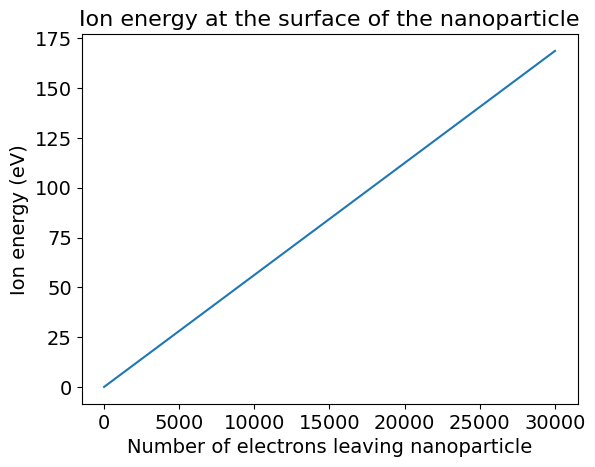

In [25]:
##### PLOT #####

plt.figure()
plt.plot(n_electrons_list, ion_energy_list)

#plt.xscale('log')
#plt.yscale('log')
plt.title("Ion energy at the surface of the nanoparticle",fontsize=16)
plt.xlabel('Number of electrons leaving nanoparticle',fontsize=14)
plt.ylabel('Ion energy (eV)',fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.show()

In [ ]:
##### INPUTS #####

'List of number of electrons leaving nanoparticle'
n_electrons = 5000

'Diameter of the nanoparticle (m)'
d = 500-9

'Number of slices the sphere should be cut into in each direction'
Nslices = 101 # preferably odd number




##### CODE #####

##### Compute values from inputs #####

'Size of one cell in the array (m)'
cellSize = d/Nslices



##### Generate sphere as 3D numpy array #####

'Radius of sphere'
radius = int((Nslices-1)/2)

'Cubic array of zeros'
sphere = np.zeros((Nslices,Nslices, Nslices))

'Coordinates of the center of the sphere in the array'
x0, y0, z0 = int(np.floor(sphere.shape[0]/2)), \
        int(np.floor(sphere.shape[1]/2)), int(np.floor(sphere.shape[2]/2))

'List of shell indices'
shell_indices = list()

for x in range(x0-radius, x0+radius+1):
    for y in range(y0-radius, y0+radius+1):
        for z in range(z0-radius, z0+radius+1):
            
            'Current radial distance'
            radial_squared = (x0-x)**2 + (y0-y)**2 + (z0-z)**2
            
            '''deb: measures how far a coordinate in A is far from the center. 
                    deb>=0: inside the sphere.
                    deb<0: outside the sphere.'''
            deb = radius**2 - radial_squared
            
            'If we are in the sphere and on its surface'
            if (deb)>=0 and radius - np.sqrt(radial_squared) < 1:
                
                'Fill surface of sphere with ones (just a check)'
                sphere[x,y,z] = 1
                
                'Current index of cell'
                index = (x,y,z)

                'Add index to list of the ring'
                shell_indices.append(index)

                

##### Compute DC current on shell #####

'Ion energies squared array'
energies = np.zeros((Nslices,Nslices))

'Loop through ring'
(i,j,k) = shell_indices[0]
    
'Number of cells on the surface'
NcellsSurface = len(shell_indices)


'How far above the nanoparticle the DC should be computed (m)'
height_list = np.arange(0,15e-9,.1e-9)

field_list = list()

for height in height_list:

    'Add height above nanoparticle'
    newi = i - height / cellSize

    'DC current'
    field = 0

    'Loop through sphere surface'
    for (x,y,z) in shell_indices:

        'Distance between index and current cell'
        r = ( np.sqrt( (x-newi)**2 + (y-j)**2 + (z-k)**2 ) + 1 ) * cellSize 

        'Charge'
        Q = e * sphere[x,y,z] / NcellsSurface

        'Electric field (V/A)'
        E = Q/(4*pi*epsilon_0*r**2) * 1e-10

        field += E * n_electrons
    
    field_list.append(field)

    
    
    

##### RESULTS #####

##### Printing inputs #####

print('Inputs:')
print('-------')
print('   Particle diameter (nanometer):            %.0f'%(d/1e-9))
print('   Number of cells in each direction         %.0f'%(Nslices))
print('   Number of electrons leaving nanoparticle: %.0f'%(n_electrons))



##### Printing results #####

print('')
print('Results:')
print('--------')

    
# # 'Surface density'
# surface_density = n_electrons / (4*pi*(d*1e9/2)**2)
    
# print('   Number of electrons leaving nanoparticle: %.0f'%(n_electrons))
# print('   Surface density (#e-/nm2):                %.5f'%(surface_density))
# print('   DC current at the surface (V/A):          %.2f'%(dc_current))
# print('')

Inputs:
-------
   Particle diameter (nanometer):            491000000000
   Number of cells in each direction         101
   Number of electrons leaving nanoparticle: 5000

Results:
--------
   Number of electrons leaving nanoparticle: 5000
   Surface density (#e-/nm2):                0.00000
   DC current at the surface (V/A):          0.02



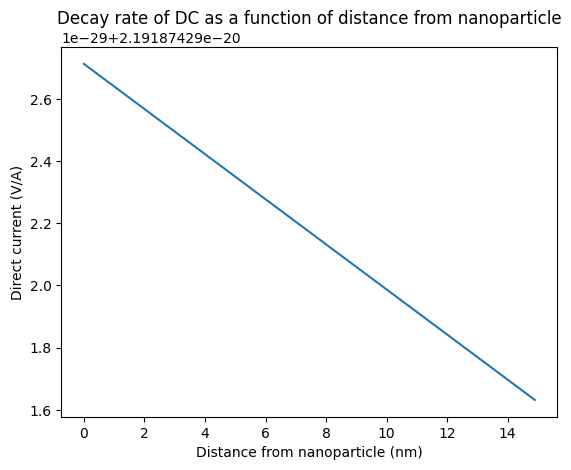

In [13]:
##### PLOT #####

plt.figure()
plt.plot(height_list*1e9, field_list)

#plt.xscale('log')
#plt.yscale('log')
plt.title("Decay rate of DC as a function of distance from nanoparticle")
plt.xlabel('Distance from nanoparticle (nm)')
plt.ylabel('Direct current (V/A)')

plt.show()